<a href="https://colab.research.google.com/github/qinyufm/deeplearning-models/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM


In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


## Get the data

In [3]:
df = web.DataReader('MSFT', data_source='yahoo', start='2018-01-01', end='2020-02-11')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,83.256378
2018-01-03,86.510002,85.970001,86.059998,86.349998,26061400.0,83.643845
2018-01-04,87.660004,86.570000,86.589996,87.110001,21912000.0,84.380028
2018-01-05,88.410004,87.430000,87.660004,88.190002,23407100.0,85.426178
2018-01-08,88.580002,87.599998,88.199997,88.279999,22113000.0,85.513359
...,...,...,...,...,...,...
2020-02-05,184.199997,178.410004,184.029999,179.899994,39186300.0,179.899994
2020-02-06,183.820007,180.059998,180.970001,183.630005,27751400.0,183.630005
2020-02-07,185.630005,182.479996,182.850006,183.889999,33529100.0,183.889999


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


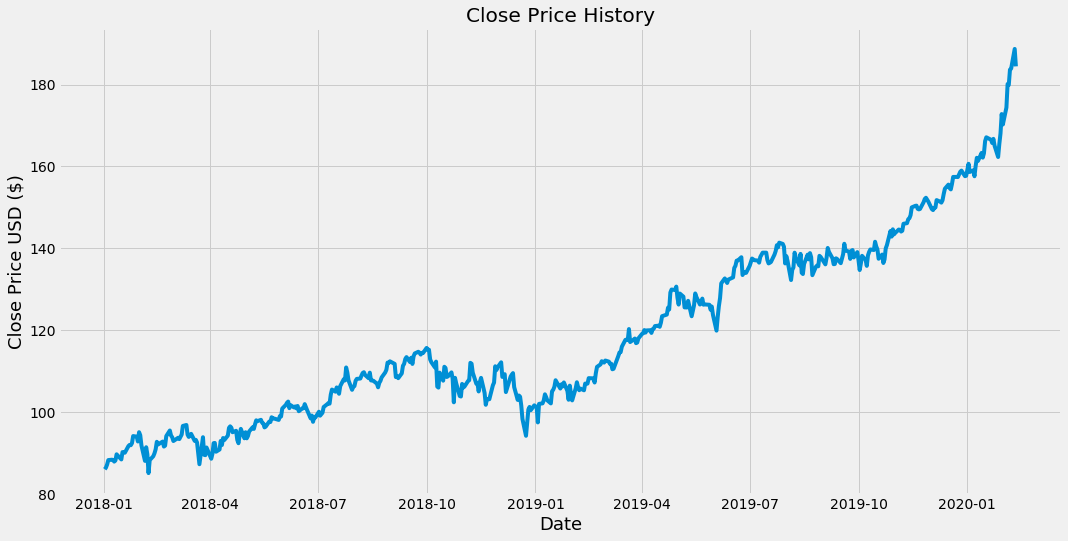

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

425

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()



[array([0.00906543, 0.0129231 , 0.02025266, 0.03066834, 0.03153628,
       0.03095765, 0.02709999, 0.02960748, 0.04426653, 0.03221137,
       0.04947437, 0.0490886 , 0.0481242 , 0.06365126, 0.06644806,
       0.06567652, 0.07059504, 0.08727935, 0.08592918, 0.0745491 ,
       0.09644132, 0.08920822, 0.06529074, 0.02883593, 0.06095091,
       0.04436299, 0.        , 0.03057188, 0.03973378, 0.04648471,
       0.05593592, 0.07377762, 0.06741246, 0.07435625, 0.06249393,
       0.06480858, 0.08727935, 0.10039538, 0.08862952, 0.08448254,
       0.07560996, 0.07753883, 0.08322883, 0.08014271, 0.08535055,
       0.09084771, 0.11119683, 0.11341494, 0.09065486, 0.08525409,
       0.08843667, 0.09248719, 0.07599573, 0.0783103 , 0.07204168,
       0.04609894, 0.02092775, 0.08457901, 0.04301282, 0.04224127])]
[0.06037221352151867]

[array([0.00906543, 0.0129231 , 0.02025266, 0.03066834, 0.03153628,
       0.03095765, 0.02709999, 0.02960748, 0.04426653, 0.03221137,
       0.04947437, 0.0490886 , 0.04

In [9]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(365, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





365/365 [==============================] - 28s 76ms/step - loss: 0.0020


In [12]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.718544511546264

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


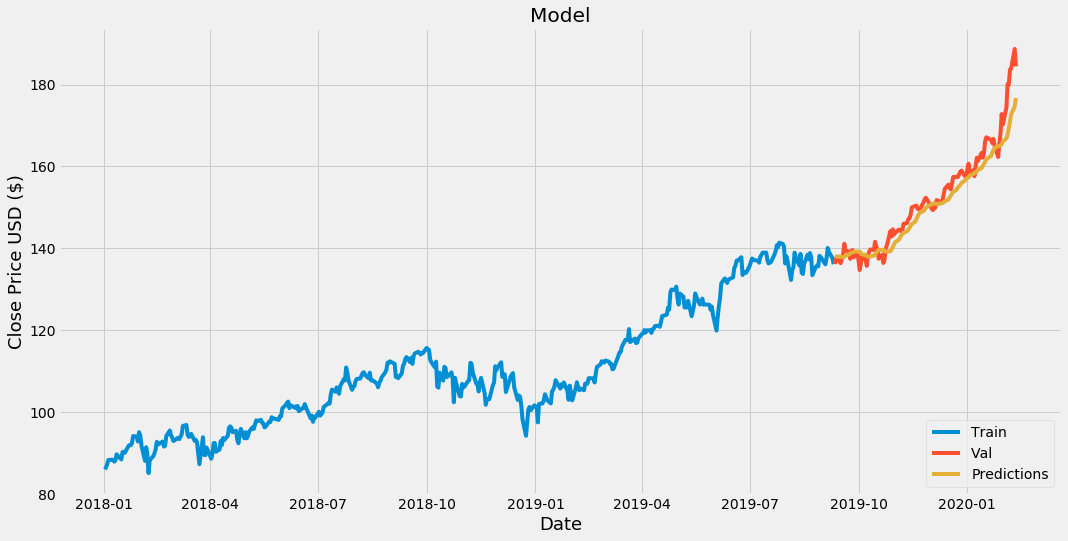

,Close,Predictions
Date,,
2019-09-11,136.119995,138.059570
2019-09-12,137.520004,137.976028
2019-09-13,137.320007,137.935867
2019-09-16,136.330002,137.908875
2019-09-17,137.389999,137.821930
...,...,...
2020-02-05,179.899994,169.285522
2020-02-06,183.630005,170.901688
2020-02-07,183.889999,172.757858


In [13]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

#Show the valid and predicted prices
valid

In [0]:
#Get the quote
apple_quote = web.DataReader('MSFT', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

# Richer syntax highlighting

Improved support for nested languages:

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```